In [243]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import time

In [244]:
#read file
data = pd.read_csv('cancer.txt', sep=",", header=None)

In [245]:
data.shape

(699, 11)

In [246]:
#remove first column containing ids
data = data.drop(data.columns[0], axis=1)

In [247]:
data.shape

(699, 10)

In [248]:
#remove non-neumerical data
from numpy import NaN
for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        if data.iloc[j,i] == '?':
            data.iloc[j,i] = data[i].mean()

In [249]:
#data = data.fillna(data.mode().iloc[0])
ndata =data.values

In [250]:
ndata.shape
ndata.astype('float32')

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]], dtype=float32)

In [251]:
x = ndata[:,:9]
y = ndata[:,9]//4
#print(np.max(y))
#print(np.min(y))
print(x.shape)

(699, 9)


In [252]:
num_feats = x.shape[1]
x.astype(float)
for i in range(num_feats):
    t = x[:,i]
    t = t.astype('float32')
    #print(type(t))
    #print(t.shape)
    x[:,i] = (t - np.min(t))/(np.max(t) - np.min(t))
    

In [253]:
#add bias term
b = np.ones((x.shape[0],1))
x = np.hstack((x,b))
print(x.shape)

(699, 10)


In [254]:
xtr,x_test,ytr,y_test = train_test_split(x,y,test_size=0.3)

In [255]:
print(ytr.shape)
print(y_test.shape)
print(xtr.shape)
print(x_test.shape)

(489,)
(210,)
(489, 10)
(210, 10)


In [256]:
#uniform random initialization of weights
w = np.random.uniform(0.0,1.0,x.shape[1]).reshape(x.shape[1],1)
#print(w)
#print(w.shape)

In [257]:
#define hyper-parameters
epochs = 1000
a = 0.2
batch_size = 30
lamda = 0.1

In [258]:
#logistic regression with constant learning rate 

t1 = time.time()
train_acc = []
test_acc = []
counter = 0
m = xtr.shape[0]
n = xtr.shape[1]

mte = x_test.shape[0]

for i in range(epochs):
   
    itr = m//batch_size + 1
    
    for j in range(itr):
        
        if j==itr-1:
            xb = xtr[(j*batch_size):,:]
            yb = ytr[(j*batch_size):]
        else:
            xb = xtr[(j*batch_size):(j+1)*batch_size, :]
            yb = ytr[(j*batch_size):(j+1)*batch_size]
            
        z = np.dot(xb,w)
        
        z = z.astype('float')
        ybar = 1/(1+np.exp(-z))
        ybar = ybar.flatten()
        
        mb = xb.shape[0]
        #cross-entropy loss in training set
        err = -np.sum(((1-yb)*np.log(1-ybar)+yb*np.log(ybar)))/mb + (lamda/mb)*norm(w)

        

        #cross-entropy loss in test set
        tmp1 = np.dot(x_test,w)
        tmp1 = tmp1.astype('float')
        tmp = 1/(1+np.exp(-tmp1))
        tmp = tmp.flatten()

        term1 = (1.0 - y_test)
        term2 = np.log(1.0 - tmp)
        term3 = y_test
        term4 = np.log(tmp)    
        tmp_err = -np.sum(term1*term2 - term3*term4)/mte + (lamda/mte)*norm(w)
        

        #calculate gradient
        one_y = 1 - yb
        one_yhat = (1 - ybar)

        for j in range(n):
            xcurr = xb[:,j]
            ntmp = (one_y*ybar - one_yhat*yb)*xcurr
            del_w = np.sum(ntmp)/mb
            rf = 1 + (counter/100)
            counter = counter+1
            w[j] = w[j]*(1 - lamda/mb)- (a/rf)*del_w
    
          
    train_acc.append(err)
    test_acc.append(tmp_err)
    
        #if(i%10 == 0):
            #print("Train Error", err)
            #print("Test Error", tmp_err)
t2 = time.time()


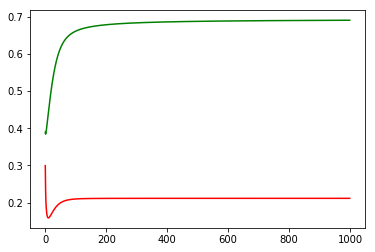

In [259]:
x_axis = np.arange(len(test_acc))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_axis,train_acc,'g')
plt.plot(x_axis,test_acc,'r')
plt.show()

In [260]:
tmp = np.where(tmp > 0.5, 1, 0)
tmp = tmp.astype('int')

In [261]:
#find number of mismatches

d2 = tmp - y_test
dacc2 = np.abs(d2)
acc2 = np.sum(dacc2)/tmp.shape[0]


ztr = np.dot(xtr,w)
ztr = ztr.astype('float')
ypred = 1/(1+np.exp(-ztr))
ypred = ypred.flatten()
ypred = np.where(ypred>0.5,1,0)
ypred = ypred.astype('int')

d1 = ytr - ypred
dacc1 = np.abs(d1)
acc1 = np.sum(dacc1)/ypred.shape[0]


In [262]:
y_true = list(y_test)
y_pred = list(tmp)
score = f1_score(y_true, y_pred, average='macro')
print("Average Time Taken per Epoch: ", (t2-t1)/epochs)
print("Total Time Taken:             ",t2-t1)
print("Minimum Training Loss:        ",min(train_acc))
print("Minimum Test Loss:            ",min(test_acc))
print("Final Training Loss:          ",train_acc[-1])
print("Final Test Loss:              ",test_acc[-1])
print("F-1 Score:                    ",score)
print("Accuracy on Training Data:    ",acc1)
print("Accuracy on Test Data:        ",acc2)

Average Time Taken per Epoch:  0.009742316961288452
Total Time Taken:              9.742316961288452
Minimum Training Loss:         0.3838941503613168
Minimum Test Loss:             0.15865620414467418
Final Training Loss:           0.6902344366659277
Final Test Loss:               0.2113035121183704
F-1 Score:                     0.9843014128728416
Accuracy on Training Data:     0.034764826175869123
Accuracy on Test Data:         0.014285714285714285
